In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller as ADF
from statsmodels.tsa.arima_model import ARIMA

In [128]:
# Read data
data = pd.read_csv("檔案.csv", parse_dates=['檔案的index'])
data = data.sort_values(by="檔案的index")
# Jan to Oct 改這裡改這裡改這裡改這裡改這裡改這裡改這裡改這裡
train = data[0:304]
test = data[304::]

,Date,Day,Red,Orange,Total
0,2019-01-01,2,161042,55170,216212
1,2019-01-02,3,115023,39494,154517
2,2019-01-03,4,108606,37800,146406
3,2019-01-04,5,142046,47154,189200
4,2019-01-05,6,157302,51601,208903
...,...,...,...,...,...
329,2019-11-26,2,109329,38342,147671
330,2019-11-27,3,111429,39547,150976
331,2019-11-28,4,116956,40159,157115
332,2019-11-29,5,150163,50242,200405


In [211]:
# Jan to Oct
train = data[0:304]
test = data[304::]

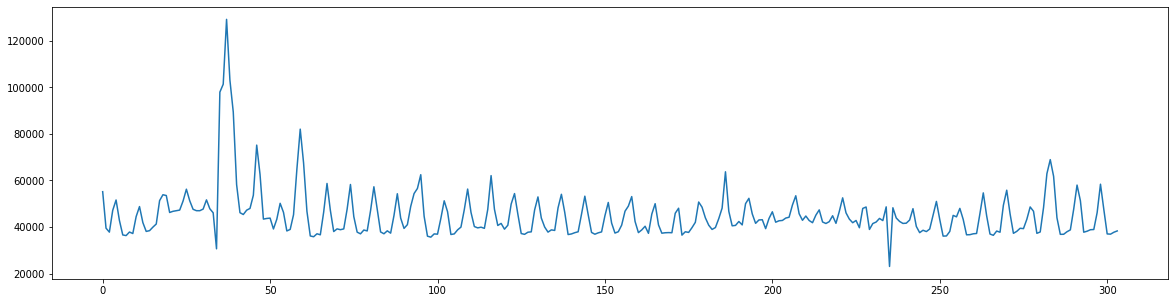

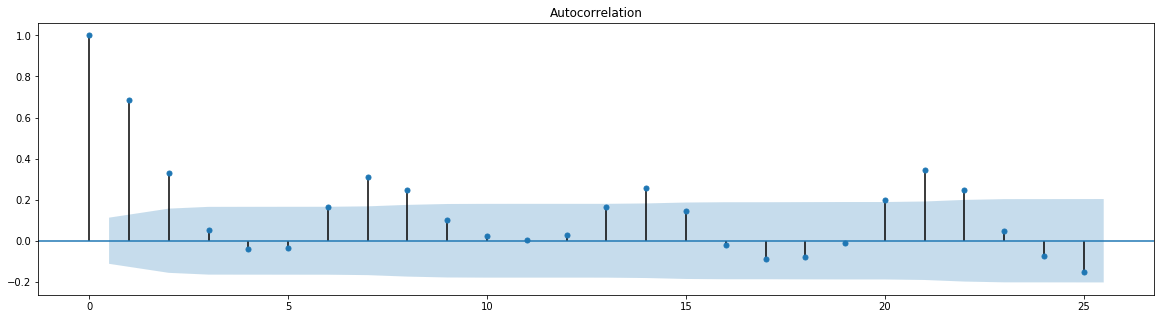

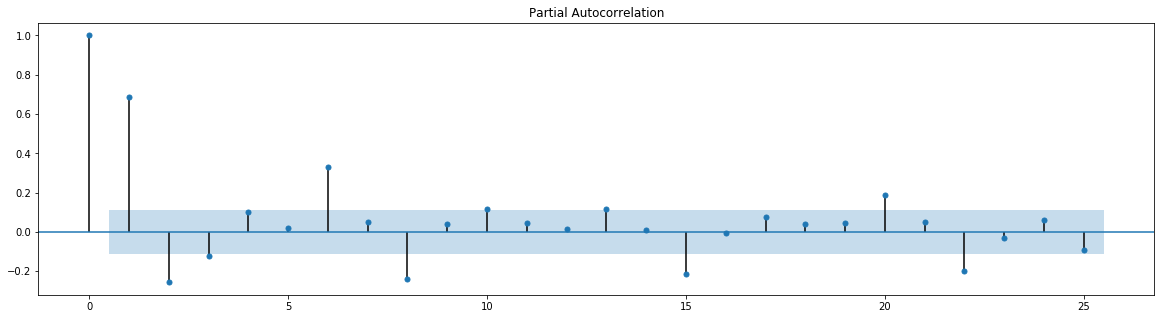

In [212]:
# 這裡會印出資料原圖，acf圖，pacf圖
y = train['看你要train哪些']
plt.plot(y)
plt.savefig("存圖片")
plot_acf(y).savefig("存圖片")
plot_pacf(y).savefig("存圖片")
plt.show()

In [213]:
ADF(y)

(-3.5877314857964535,
 0.005999953813048066,
 14,
 289,
 {'1%': -3.4531816058796143,
  '5%': -2.871593390724642,
  '10%': -2.5721268156511536},
 5894.21281832779)

(-3.5877314857964535, 0.005999953813048066, 14, 289, {'1%': -3.4531816058796143, '5%': -2.871593390724642, '10%': -2.5721268156511536}, 5894.21281832779)
(-6.095706377375107, 1.0113106825082537e-07, 15, 287, {'1%': -3.453342167806272, '5%': -2.871663828287282, '10%': -2.572164381381345}, 5884.9330746646965)


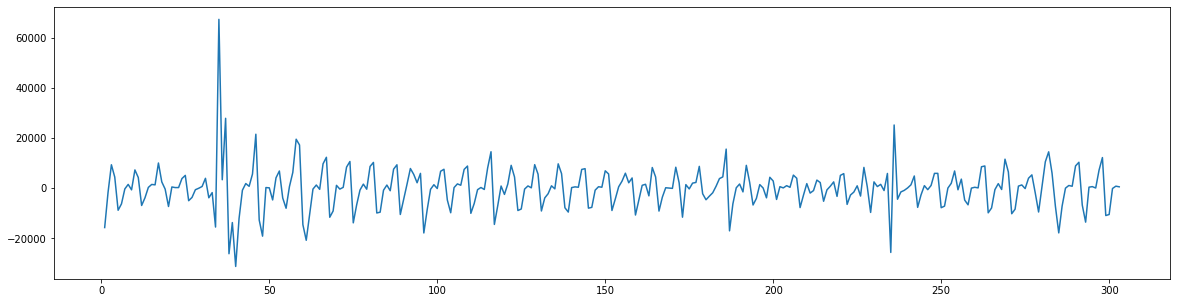

In [214]:
# ADF BJ4
print(ADF(y))
D_data = y.diff(1).dropna()
plt.plot(D_data)
print(ADF(D_data))

In [215]:
ADF(D_data)

(-6.095706377375107,
 1.0113106825082537e-07,
 15,
 287,
 {'1%': -3.453342167806272,
  '5%': -2.871663828287282,
  '10%': -2.572164381381345},
 5884.9330746646965)

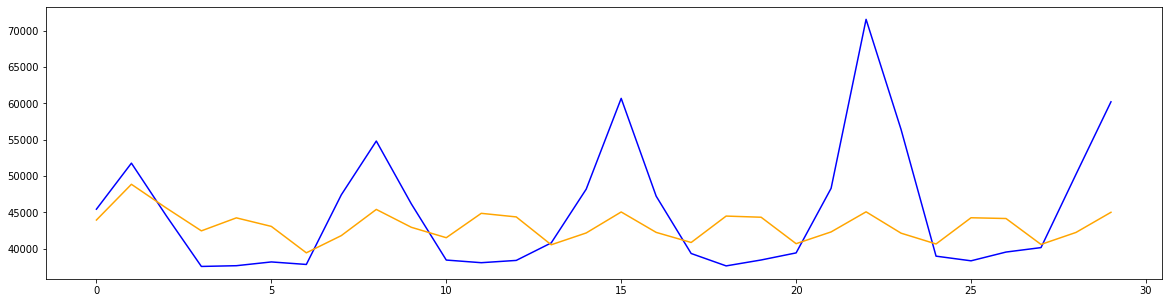

In [220]:
# 這裡算是訓練然後預測下一個月的資料
# 下面有個steps30，就是要預測後30筆data
#Fit
rcParams['figure.figsize'] = 20, 5
yf = y.astype('float32')
model = ARIMA(yf, (5,1,4)).fit()
predicts = model.forecast(steps=30)
pDF = pd.DataFrame(predicts[0])
Adata = test
Adata.index = range(len(Adata))
plt.plot(Adata['改這裡'], color="blue")
plt.plot(pDF, color="Orange")
plt.savefig("改這裡")
plt.show()

In [221]:
# 算誤差
error = ((pDF-Adata["改這裡"])/Adata["改這裡"])*100
error = error[0].abs()
q = error.sum()/30
print(q)

5.4987420464481005
